## Notebook for ROC curves of light/c-rejection vs b-efficiency

- Construct ROC curves, as well as ROC-curve ratios against baseline
- Graph db-values
- investigate fc-parameter selection

In [1]:
%env NDIVE_MODEL_PATH=/gpfs/slac/atlas/fs1/d/jshoe/saved_models/
import importlib
import matplotlib.pyplot as plt
import numpy as np

import diffvert.evaluation.plot_helpers as ph
import diffvert.utils.data_format as daf
from functools import partial

env: NDIVE_MODEL_PATH=/gpfs/slac/atlas/fs1/d/jshoe/saved_models/


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
plt.rcParams["font.size"]=14

In [5]:
""" Load in outputs for trained models. """

# ftag_perfect_vertex = ph.get_test_output("ftag_true_vertex_all_loss", 200)
# ftag_ndive_add_weights_loss = ph.get_test_output("ftag_ndive_add_weights_loss", 200)
# ftag_wndive_softmax = ph.get_test_output("ftag_ndive_all_loss_softmax", 200)
# ftag_true_weights = ph.get_test_output("ftag_true_weights_all_loss", 200)
# ftag_wndive_outs = ph.get_test_output("ftag_ndive_all_loss", 200)
ftag_no_ghost = ph.get_test_output("ftag_ndive_no_ghost", 200)
ftag_no_ghost_clip = ph.get_test_output("ftag_ndive_no_ghost_clip", 200)
ftag_ndive_all_loss = ph.get_test_output("ftag_ndive_all_loss", 200)
ftag_ndive_no_track_pair_loss = ph.get_test_output("ftag_ndive_no_track_pair_loss", 200)
ftag_one_hot = ph.get_test_output("ftag_one_hot", 200)

ftag_all_loss = ph.get_test_output("ftag_all_loss", None, 0)
ftag_all_loss_two = ph.get_test_output("ftag_all_loss_two", 150)

# different baseline models, all without ndive
ftag_no_ndive_outs_three = ph.get_test_output("ftag_three_layer_all_loss", 200)
ftag_no_ndive_outs_two = ph.get_test_output("ftag_two_layer_all_loss", 200)
ftag_no_ndive_outs_one = ph.get_test_output("ftag_one_layer_all_loss", 200)
ftag_baseline_one_adam = ph.get_test_output("ftag_base_one_adam", 220)
ftag_baseline_three_adam = ph.get_test_output("ftag_base_three_adam", 150)
ftag_ndive_no_ghost_normalize_vtx_loss = ph.get_test_output("ftag_ndive_no_ghost_normalize_vtx_loss",200)
ftag_base_big_adam = ph.get_test_output("ftag_base_big_adam", 160)
ftag_base_big = ph.get_test_output("ftag_base_big", 150)

ftag_all_loss_mult = ph.get_test_output_list(["ftag_all_loss"]*5, model_numbers=[0,1,2,3,4])
ftag_base_one =  ph.get_test_output("ftag_base_one", None, 0)
ftag_base_one_mult = ph.get_test_output_list(["ftag_base_one"]*5, model_numbers=[0,1,2,3,4])

testing_outs = ph.get_test_output("test_again", 200)
ftag_base_big_batch = ph.get_test_output("ftag_base_big_batch")

ftag_perfect_vertex = ph.get_test_output("ftag_true_vertex")
ftag_perfect_weights = ph.get_test_output("ftag_true_weights")

ftag_ndive_big_batch = ph.get_test_output("ftag_ndive_big_batch", model_number=0)


found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs
found previous cached outputs


In [11]:
""" db function definition. Cell must be run before running roc-curves. """
def calculate_db(outputs, inputs=None, fc=0.5, has_ghost=True):
    """ Calculate db value for output set and given fc.

    db is defined as lg(prob(b)/(fc*prob(c)+(1-fc)*prob(u)))
    Method signature satisfies requirements for ph graph_output_info
    """
    numerator = outputs[:,daf.JetPrediction.PROB_B]
    denominator = (1-fc)*outputs[:,daf.JetPrediction.PROB_U] \
                   + fc*outputs[:,daf.JetPrediction.PROB_C]
    return np.log(numerator/denominator)

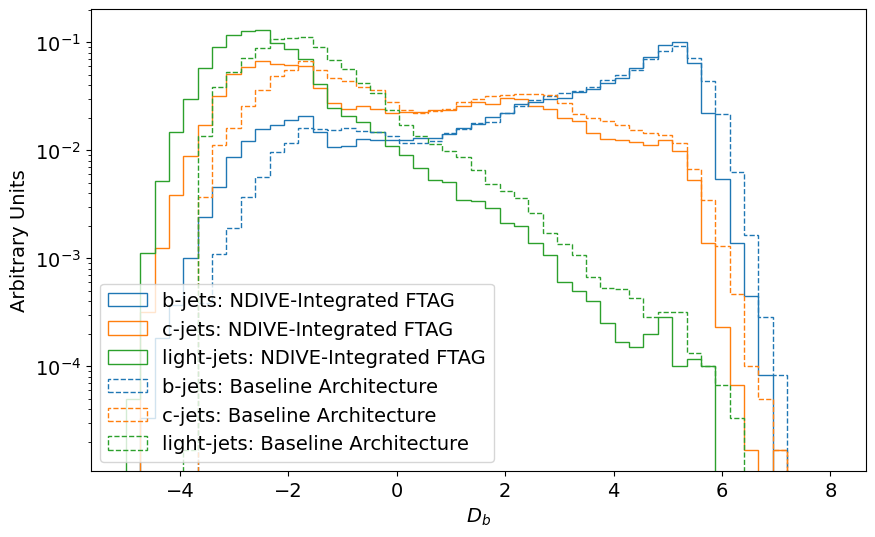

In [12]:
""" Graph histogram of db values by true jet flavor """

fc = 0.05
fig, ax = plt.subplots(1, figsize=(10,6))
args=dict(bins=np.linspace(-5,8,50))
#ph.graph_output_info_dict(partial(calculate_db,fc=fc), ax, ftag_all_loss, plot_avgs=False, hist_options=args, labels=["b-jets: NDIVE-Integrated FTAG","c-jets: NDIVE-Integrated FTAG","light-jets: NDIVE-Integrated FTAG"])
ph.graph_output_info_dict(partial(calculate_db,fc=fc), ax, ftag_all_loss, plot_avgs=False, hist_options=args, labels=["b-jets: NDIVE-Integrated FTAG","c-jets: NDIVE-Integrated FTAG","light-jets: NDIVE-Integrated FTAG"])
# ph.graph_output_info_dict(partial(calculate_db,fc=fc), ax, ftag_ndive_all_loss, hist_options=args)

# ph.graph_output_info_dict(calculate_db, ax, ftag_ndive_add_weights_loss, hist_options=args)

args.update(dict(linestyle='dashed'))
# ph.graph_output_info_dict(partial(calculate_db,fc=fc), ax, ftag_no_ndive_outs_one, hist_options=args)
#ph.graph_output_info_dict(partial(calculate_db,fc=fc), ax, ftag_no_ndive_outs_one, plot_avgs=False, hist_options=args, labels=["b-jets: Baseline Architecture","c-jets: Baseline Architecture","light-jets: Baseline Architecture"])
ph.graph_output_info_dict(partial(calculate_db,fc=fc), ax, ftag_base_one, plot_avgs=False, hist_options=args, labels=["b-jets: Baseline Architecture","c-jets: Baseline Architecture","light-jets: Baseline Architecture"])
ax.set_yscale('log')
ax.set_ylabel("Arbitrary Units")
ax.set_xlabel("$D_{b}$")
fig.savefig("plots/Db.png")

29923 0.49871666666666664


/tmp/ipykernel_67843/3245081898.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
/tmp/ipykernel_67843/3245081898.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]


28177 0.4696166666666667
29923 0.49871666666666664


/tmp/ipykernel_67843/3245081898.py:79: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim([0, 700])


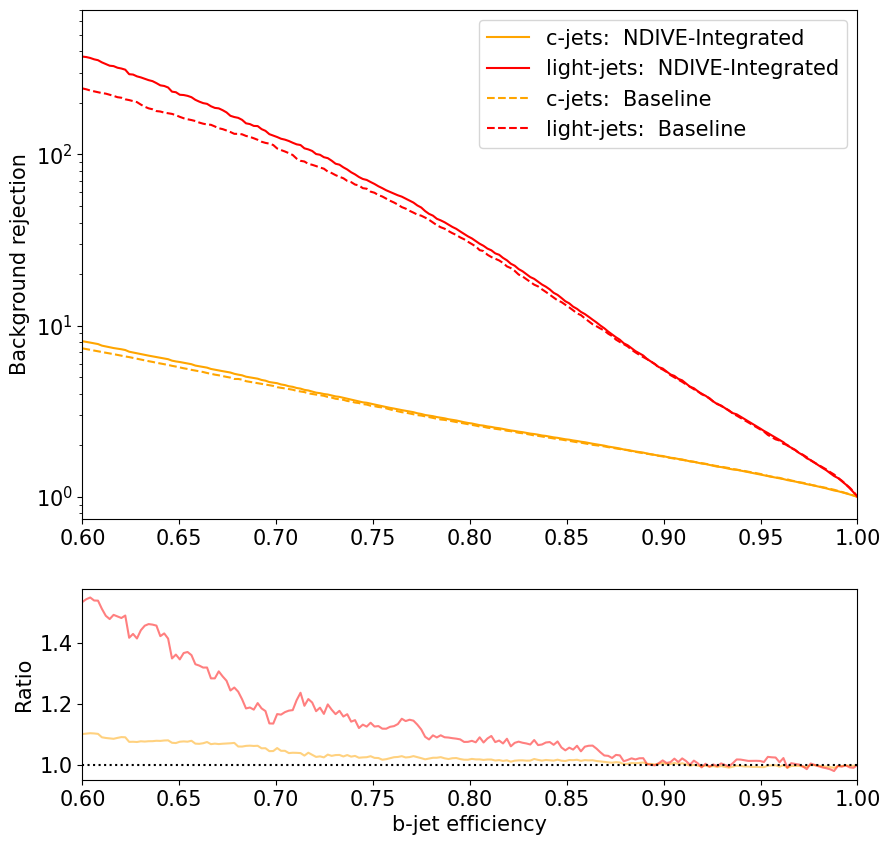

In [31]:
def get_cu_rej(efficiencies, outs, fc=0.5):
    """ Return list of c and u rejections for given list of efficiencies.

    Calculates rejections based on a variety of cut locations. For each efficiency find
    cut which produces b efficiency closest to the given value and calculate corresponding
    c and u rejections (given the cut)
    """
    db_cuts = np.linspace(-6,10,1000)

    b_db = calculate_db(outs["b_output_arr"], fc=fc)
    c_db = calculate_db(outs["c_output_arr"], fc=fc)
    u_db = calculate_db(outs["u_output_arr"], fc=fc)

    print(np.sum(b_db > 4), np.sum(b_db>4)/len(b_db))
    b_eff = [np.sum(b_db > cut)/len(b_db) for cut in db_cuts]
    c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
    u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]

    # now plot c/r urejection vs b_eff. want to go in generic way though so we can compare across algs
    #   for each efficiency find which db cut gave value closest to this efficiency and use that
    #   since db cut step size is small this should be pretty accurate
    c_rej_out = np.array([c_rej[np.argmin(np.abs(b_eff-eff))] for eff in efficiencies])
    # b_dists = [np.min(np.abs(b_eff-eff)) for eff in efficiencies]
    # print(f"b dist mean: {np.mean(b_dists):.5f}, max: {np.max(b_dists):.5f}")
    u_rej_out = np.array([u_rej[np.argmin(np.abs(b_eff-eff))] for eff in efficiencies])
    return c_rej_out, u_rej_out


def roc_curve(
        axtop, axbot, efficiencies, outs, baseline_values=None, 
        fc=0.5, colors=['orange', 'red'], label='', args=dict(), graph_u=True,
    ):
    """ Plot roc curve for a given output set.
    
    Args:
        axtop: top axis of roc-curve, where basic curve will be displayed
        axbot: bottom axis, where ratio of roc-curves is plotted
        efficiencies: list of efficiencies for curve, acts as x-axis coordinates
        outs: output dictionary, from saved file and ph.get_test_output
        baseline_values: baseline outputs to divide against for roc-curve ratio (bottom plot)
        fc: fc value to use in calculation of db for cuts
        colors: colors for b and u output rejection lines
        label: label for output names (appended to 'c' and 'u')
    """
    c_rej_out, u_rej_out = get_cu_rej(efficiencies, outs, fc=fc)
    axtop.plot(efficiencies, c_rej_out, **args, color=colors[0], label='c-jets: '+label)
    if graph_u:
        axtop.plot(efficiencies, u_rej_out, **args, color=colors[1], label='light-jets: '+label)

    if baseline_values is not None:
        c_rej_baseline, u_rej_baseline = baseline_values
        axbot.plot(efficiencies, c_rej_out/c_rej_baseline, label='c-jets: '+label, **args, color=colors[0], alpha=0.5)
        if graph_u:
            axbot.plot(efficiencies, u_rej_out/u_rej_baseline, label='light-jets: '+label, **args, color=colors[1], alpha=0.5)


fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), gridspec_kw={'height_ratios': [4,1.5]}) # was 4,1.5

fc=0.05
efficiency_lower_bound=0.6

efficiencies = np.linspace(efficiency_lower_bound,1,200)

baseline_outs = ftag_base_one#ftag_base_big_batch
baseline_values = get_cu_rej(efficiencies, baseline_outs, fc=fc)

roc_curve(
    ax1, ax2, efficiencies, ftag_all_loss, baseline_values=baseline_values,
    fc=fc, args=dict(linestyle='-'), label=' NDIVE-Integrated',
)

roc_curve(
    ax1, ax2, efficiencies, outs=baseline_outs, fc=fc, label=' Baseline', args=dict(linestyle='--'),
)

ax1.set_yscale('log')
ax1.set_ylabel('Background rejection')
ax1.set_xlim([efficiency_lower_bound, 1.0])
ax1.set_ylim([0, 700])

ax2.axhline(1, color='black', ls=':')
ax2.set_ylabel('Ratio')
ax2.set_xlabel('b-jet efficiency')
ax2.set_xlim([efficiency_lower_bound, 1.0])
# ax2.set_ylim([0.9, 1.22])

ax1.legend()
plt.savefig("plots/moneyplot.png")

28177 0.4696166666666667


/tmp/ipykernel_67843/3245081898.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
/tmp/ipykernel_67843/3245081898.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]


36844 0.6140666666666666
28177 0.4696166666666667


/tmp/ipykernel_67843/2200195209.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim([0, 2000])


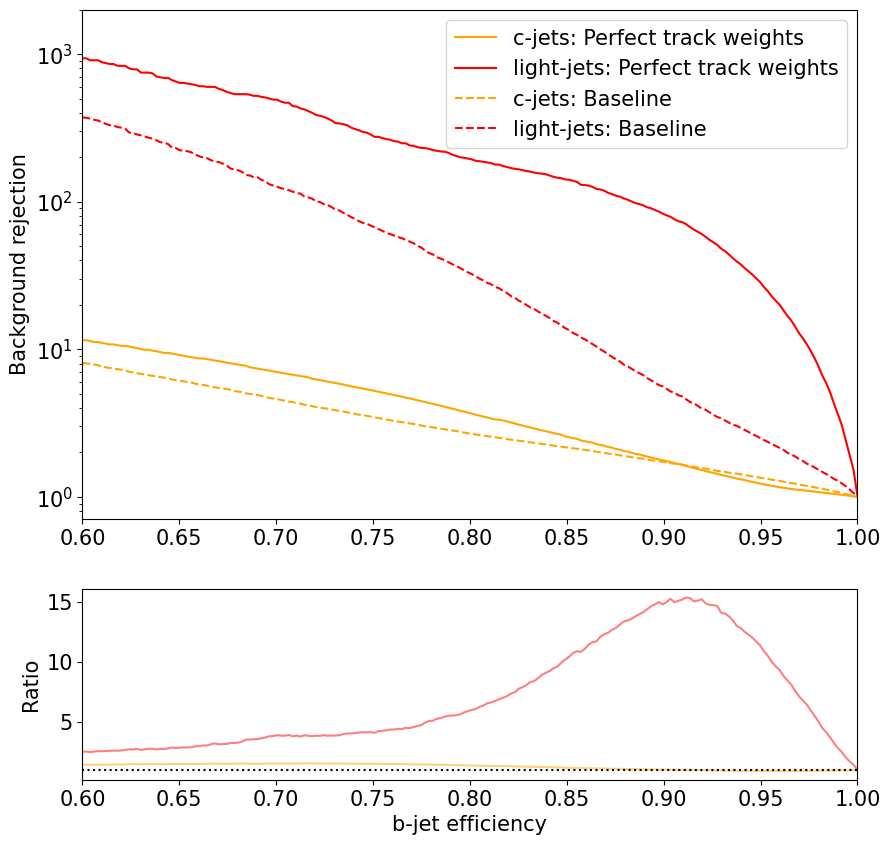

In [32]:
plt.rcParams["font.size"]=15
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), gridspec_kw={'height_ratios': [4,1.5]}) # was 4,1.5

fc=0.05
efficiency_lower_bound=0.6

efficiencies = np.linspace(efficiency_lower_bound,1,200)

baseline_outs = ftag_all_loss#ftag_all_loss_mult[2]
baseline_values = get_cu_rej(efficiencies, baseline_outs, fc=fc)

roc_curve(
    ax1, ax2, efficiencies, ftag_perfect_weights, baseline_values=baseline_values,
    fc=fc, args=dict(linestyle='-'), label='Perfect track weights',
)

roc_curve(
    ax1, ax2, efficiencies, outs=baseline_outs, fc=fc, 
    label='Baseline', args=dict(linestyle='--'),
)

ax1.set_yscale('log')
ax1.set_ylabel('Background rejection')
ax1.set_xlim([efficiency_lower_bound, 1.0])
ax1.set_ylim([0, 2000])

ax2.axhline(1, color='black', ls=':')
ax2.set_ylabel('Ratio')
ax2.set_xlabel('b-jet efficiency')
ax2.set_xlim([efficiency_lower_bound, 1.0])
# ax2.set_ylim([0.9, 1.22])

ax1.legend()
plt.savefig("plots/ROC_perfectweights.png")

28177 0.4696166666666667


/tmp/ipykernel_67843/3245081898.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
/tmp/ipykernel_67843/3245081898.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]


26141 0.4356833333333333
28177 0.4696166666666667


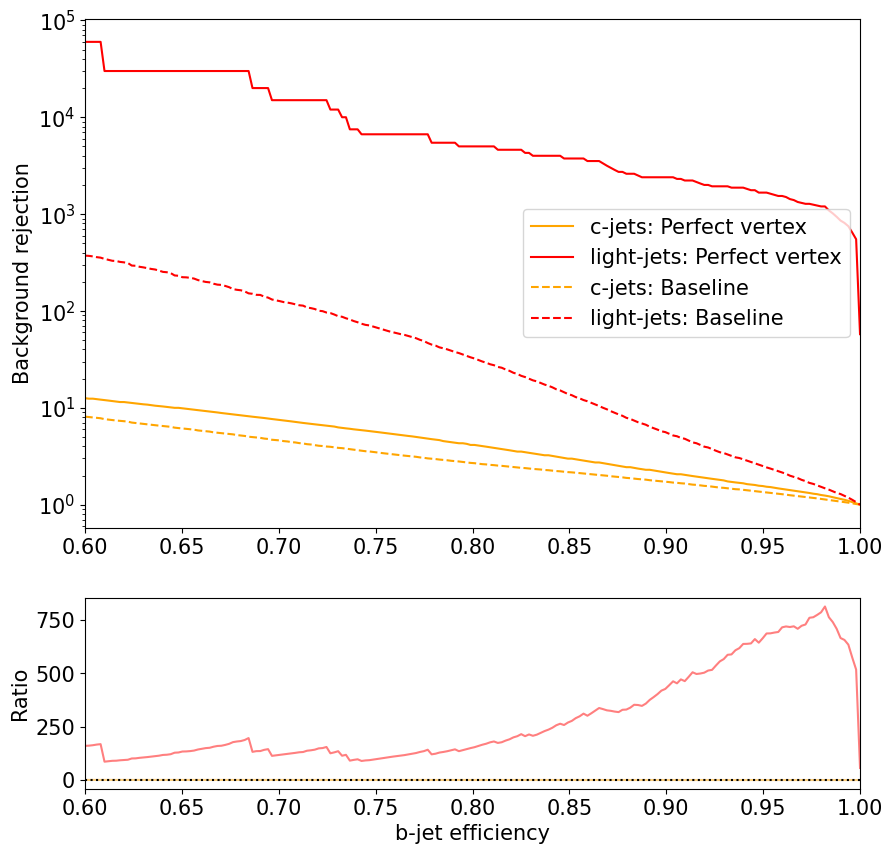

In [33]:
plt.rcParams["font.size"]=15
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), gridspec_kw={'height_ratios': [4,1.5]}) # was 4,1.5

fc=0.05
efficiency_lower_bound=0.6

efficiencies = np.linspace(efficiency_lower_bound,1,200)

baseline_outs = ftag_all_loss_mult[0]
baseline_values = get_cu_rej(efficiencies, baseline_outs, fc=fc)

roc_curve(
    ax1, ax2, efficiencies, ftag_perfect_vertex, baseline_values=baseline_values,
    fc=fc, args=dict(linestyle='-'), label='Perfect vertex', graph_u=True,
)

roc_curve(
    ax1, ax2, efficiencies, outs=baseline_outs, fc=fc, 
    label='Baseline', args=dict(linestyle='--'), graph_u=True,
)

ax1.set_yscale('log')
ax1.set_ylabel('Background rejection')
ax1.set_xlim([efficiency_lower_bound, 1.0])
#ax1.set_ylim([0, 2000])

ax2.axhline(1, color='black', ls=':')
ax2.set_ylabel('Ratio')
ax2.set_xlabel('b-jet efficiency')
ax2.set_xlim([efficiency_lower_bound, 1.0])
# ax2.set_ylim([0.9, 1.22])

ax1.legend()
plt.savefig("plots/ROC_perfectvertex.png")

/tmp/ipykernel_67843/811711323.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
/tmp/ipykernel_67843/811711323.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]
/tmp/ipykernel_67843/811711323.py:107: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim([0, 300])


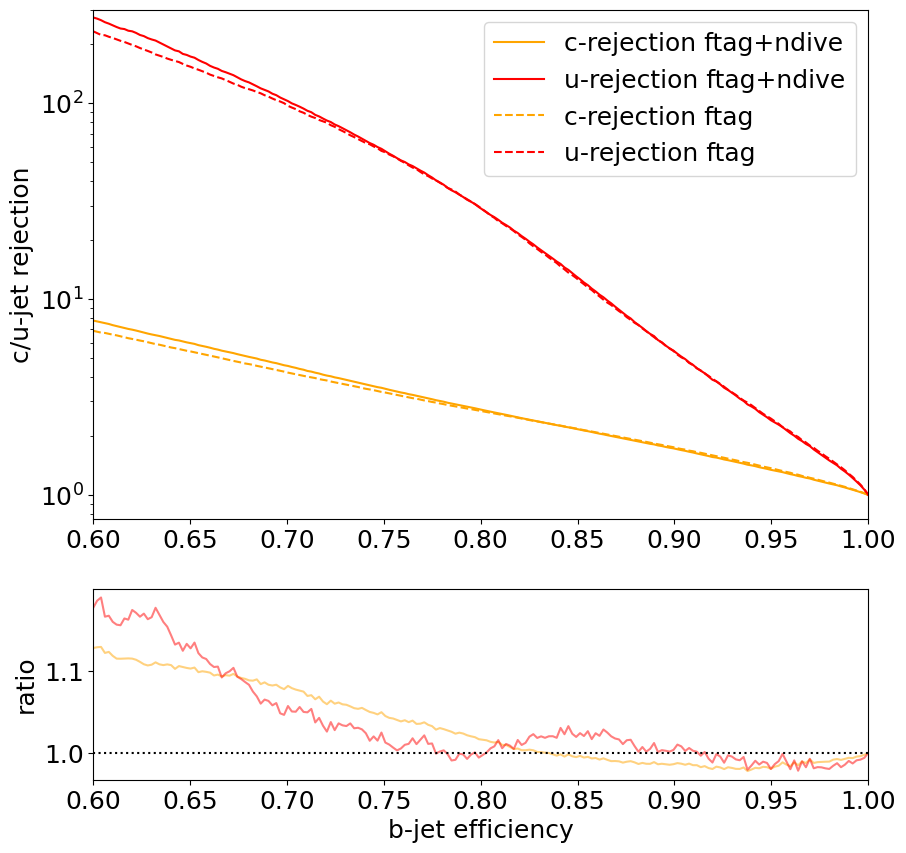

In [34]:
""" Create ROC curve for multiple trained models. """
def get_cu_rej_list(efficiencies, outs_list, fc=0.5):
    """ Return list of b and c rejections for given list of efficiencies.

    Calculates rejections based on a variety of cut locations. For each efficiency find
    cut which produces b efficiency closest to the given value and calculate corresponding
    c and u rejections (given the cut)
    """
    db_cuts = np.linspace(-6,10,1000)

    c_rejs = []
    u_rejs = []
    for outs in outs_list:
        b_db = calculate_db(outs["b_output_arr"], fc=fc)
        c_db = calculate_db(outs["c_output_arr"], fc=fc)
        u_db = calculate_db(outs["u_output_arr"], fc=fc)

        b_eff = [np.sum(b_db > cut)/len(b_db) for cut in db_cuts]
        c_rej = [len(c_db)/np.sum(c_db > cut) for cut in db_cuts]
        u_rej = [len(u_db)/np.sum(u_db > cut) for cut in db_cuts]

        # now plot c/r urejection vs b_eff. want to go in generic way though so we can compare across algs
        #   for each efficiency find which db cut gave value closest to this efficiency and use that
        #   since db cut step size is small this should be pretty accurate
        c_rej_out = np.array([c_rej[np.argmin(np.abs(b_eff-eff))] for eff in efficiencies])
        u_rej_out = np.array([u_rej[np.argmin(np.abs(b_eff-eff))] for eff in efficiencies])
        c_rejs.append(c_rej_out)
        u_rejs.append(u_rej_out)
    c_rej_avg = np.average(np.stack(c_rejs), axis=0)
    u_rej_avg = np.average(np.stack(u_rejs), axis=0)
    c_rej_std_err = np.std(np.stack(c_rejs), axis=0) 
    u_rej_std_err = np.std(np.stack(u_rejs), axis=0)
    return c_rej_avg, u_rej_avg, c_rej_std_err, u_rej_std_err


def roc_curve_list(
        axtop, axbot, efficiencies, outs_list, baseline_values=None, 
        fc=0.5, colors=['orange', 'red'], label='', plot_errs=True, args={},
    ):
    """ Plot roc curve for a given output set.
    
    Args:
        axtop: top axis of roc-curve, where basic curve will be displayed
        axbot: bottom axis, where ratio of roc-curves is plotted
        efficiencies: list of efficiencies for curve, acts as x-axis coordinates
        outs: list of output dictionaries, from saved file and ph.get_test_output
        baseline_values: baseline outputs to divide against for roc-curve ratio (bottom plot)
        fc: fc value to use in calculation of db for cuts
        colors: colors for b and u output rejection lines
        label: label for output names (appended to 'c' and 'u')
    """
    c_rej_out, u_rej_out, c_rej_out_std_err, u_rej_out_std_err = get_cu_rej_list(
        efficiencies, outs_list, fc=fc,
    )
    axtop.plot(efficiencies, c_rej_out, **args, color=colors[0], label='c'+label)
    axtop.plot(efficiencies, u_rej_out, **args, color=colors[1], label='u'+label)
    if plot_errs:
        axtop.fill_between(
            efficiencies, c_rej_out-c_rej_out_std_err, c_rej_out+c_rej_out_std_err,
            color=colors[0], alpha=0.2,
        )
        axtop.fill_between(
            efficiencies, u_rej_out-u_rej_out_std_err, u_rej_out+u_rej_out_std_err,
            color=colors[1], alpha=0.2,
        )

    if baseline_values is not None:
        c_rej_baseline, u_rej_baseline, c_rej_base_std_err, u_rej_base_std_err = baseline_values
        axbot.plot(efficiencies, c_rej_out/c_rej_baseline, label='c'+label, **args, color=colors[0], alpha=0.5)
        axbot.plot(efficiencies, u_rej_out/u_rej_baseline, label='u'+label, **args, color=colors[1], alpha=0.5)
        tot_c_err = c_rej_out/c_rej_baseline * c_rej_out_std_err/c_rej_out
        tot_u_err = u_rej_out/u_rej_baseline * u_rej_out_std_err/u_rej_out
        c_ratio = c_rej_out/c_rej_baseline
        u_ratio = u_rej_out/u_rej_baseline
        if plot_errs:
            axbot.fill_between(
                efficiencies, c_ratio-tot_c_err, c_ratio+tot_c_err, color=colors[0], alpha=0.2,
            )
            axbot.fill_between(
                efficiencies, u_ratio-tot_u_err, u_ratio+tot_u_err, color=colors[1], alpha=0.2,
            )

plt.rcParams['font.size'] = 18
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), gridspec_kw={'height_ratios': [4,1.5]}) # was 4,1.5

fc=0.05 # FC PARAMETER - AFFECTS HOW OUTPUT LOOKS
efficiency_lower_bound=0.6

efficiencies = np.linspace(efficiency_lower_bound,1,200)

baseline_outs = ftag_base_one_mult # BASELINE
baseline_values = get_cu_rej_list(efficiencies, baseline_outs, fc=fc)

roc_curve_list(
    ax1, ax2, efficiencies, ftag_all_loss_mult, baseline_values=baseline_values,
    fc=fc, args=dict(linestyle='-'), label='-rejection ftag+ndive', plot_errs=False,
)

roc_curve_list(
    ax1, ax2, efficiencies, outs_list=baseline_outs,
    fc=fc, label='-rejection ftag', plot_errs=False, args=dict(linestyle='--'),
)

ax1.set_yscale('log')
ax1.set_ylabel('c/u-jet rejection')
ax1.set_xlim([efficiency_lower_bound, 1.0])
ax1.set_ylim([0, 300])

ax2.axhline(1, color='black', ls=':')
ax2.set_ylabel('ratio')
ax2.set_xlabel('b-jet efficiency')
ax2.set_xlim([efficiency_lower_bound, 1.0])
# ax2.set_ylim([0.9, 1.22])

ax1.legend()


In [9]:
""" Plot how rejection looks for different fc values, and fixed efficiency.

Efficiencies typically used for working points: 60%, 70%, 77%, 85% 
"""
def get_working_point_cut(desired_efficiency, fc, outputs):
    """ Get cut on db value to produce desired efficiency for given fc parameter. """
    
    db_values = calculate_db(outputs, fc=fc)
    db_values.sort()
    cutoff_pt = int((1-desired_efficiency) * len(db_values))
    return db_values[cutoff_pt]

def rejection_comparison(ax1, ax2, ax3, outs, desired_efficiency=0.6):
    """ Plot rejection values against different fc parameters for a fixed efficiency. 
    
    Args:
        ax1/ax2/ax3: axis for u rej against c rej / c rej against fc / u rej against fc
        outs: outputs in dictionary format
        desired_efficiency: b-jet efficiency (higher is more inclusive)
    """
    fc_vals = np.linspace(0.0, 1.0, 300)
    
    c_rejection_vals = []
    u_rejection_vals = []
    for fc in fc_vals:
        cut = get_working_point_cut(desired_efficiency, fc, outs["b_output_arr"])
        c_db = calculate_db(outs["c_output_arr"], fc=fc)
        u_db = calculate_db(outs["u_output_arr"], fc=fc)

        c_rej = len(c_db)/np.sum(c_db > cut)
        u_rej = len(u_db)/np.sum(u_db > cut)
        c_rejection_vals.append(c_rej)
        u_rejection_vals.append(u_rej)
    
    ax1.plot(c_rejection_vals, u_rejection_vals)
    ax1.set_xlabel("c rejection")
    ax1.set_ylabel("u rejection")

    ax2.plot(fc_vals, c_rejection_vals)
    ax2.set_xlabel("fc")
    ax2.set_ylabel("c rejection")

    ax3.plot(fc_vals, u_rejection_vals)
    ax3.set_xlabel("fc")
    ax3.set_ylabel("u rejection")


In [10]:

efficiencies = np.array([0.6, 0.7, 0.8, 0.9])
fc=0.05
u_rej, c_rej = get_cu_rej(efficiencies, ftag_base_big_batch, fc=fc)
for idx, eff in enumerate(efficiencies):
    print(f"at efficiency {eff} get u {u_rej[idx]:.3f}")
    print(f"at efficiency {eff} get c {c_rej[idx]:.3f}")

NameError: name 'get_cu_rej' is not defined

Text(0.5, 0.98, 'b-jet efficiency: 0.6')

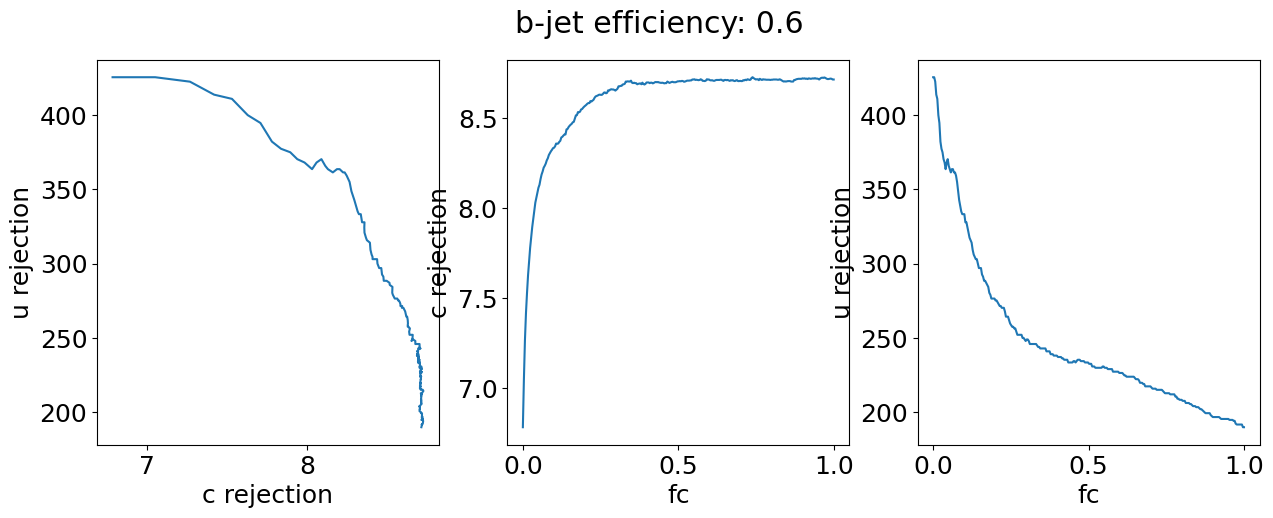

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
b_efficiency = .6
rejection_comparison(ax1, ax2, ax3, ftag_base_big_batch, b_efficiency)
plt.suptitle(f"b-jet efficiency: {b_efficiency}")

Text(0.5, 0.98, 'b-jet efficiency: 0.85')

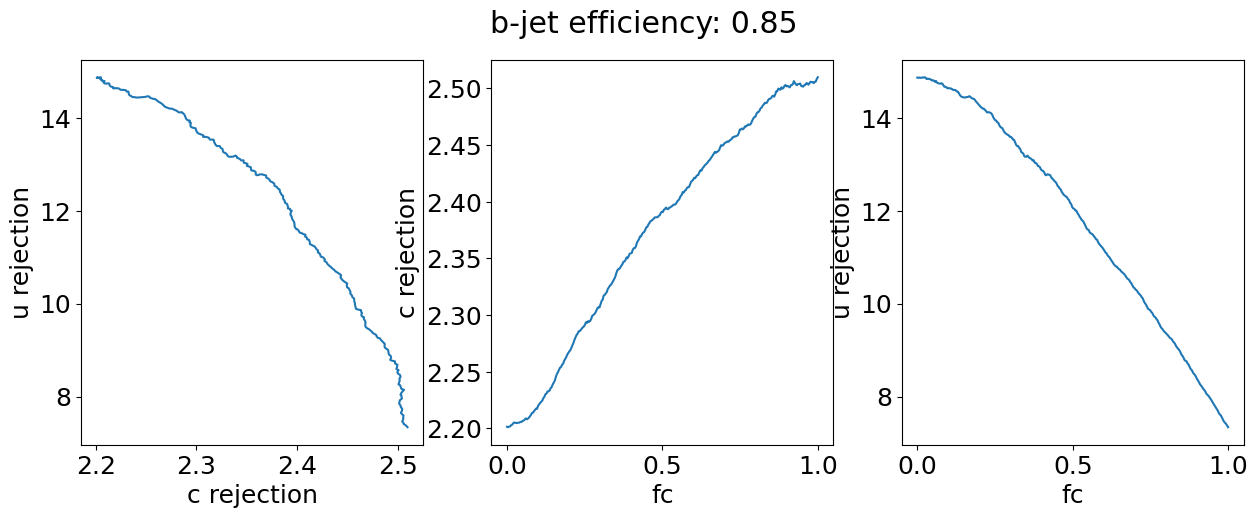

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
b_efficiency = .85
rejection_comparison(ax1, ax2, ax3, ftag_base_big_batch, b_efficiency)
plt.suptitle(f"b-jet efficiency: {b_efficiency}")